# Bivariate Data
Bivariate data is data with 2 variables. This is usually used to plot relationship between these variables.  
We generally use Join Plot, Hexbin plots to visualize these data

### Lets try to plot relation between Free Sulphur Dioxide and Total Sulphur Dioxide quantity in Wines

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('winequality-white.csv', 
                   names=['fixed_acidity', 'volatile_acidity', 'citric_acidity', 'residual_sugar',
                          'chlorides', 'free_sulphur_dioxide', 'total_sulphur_dioxide', 'density',
                          'ph','sulphates','alcohol', 'quality'], 
                   skiprows=1,
                   sep=r'\s*;\s*', engine='python')
data.head()

fixed_acidity  volatile_acidity  citric_acidity  residual_sugar  chlorides  \
0            7.0              0.27            0.36            20.7      0.045   
1            6.3              0.30            0.34             1.6      0.049   
2            8.1              0.28            0.40             6.9      0.050   
3            7.2              0.23            0.32             8.5      0.058   
4            7.2              0.23            0.32             8.5      0.058   

   free_sulphur_dioxide  total_sulphur_dioxide  density    ph  sulphates  \
0                  45.0                  170.0   1.0010  3.00       0.45   
1                  14.0                  132.0   0.9940  3.30       0.49   
2                  30.0                   97.0   0.9951  3.26       0.44   
3                  47.0                  186.0   0.9956  3.19       0.40   
4                  47.0                  186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

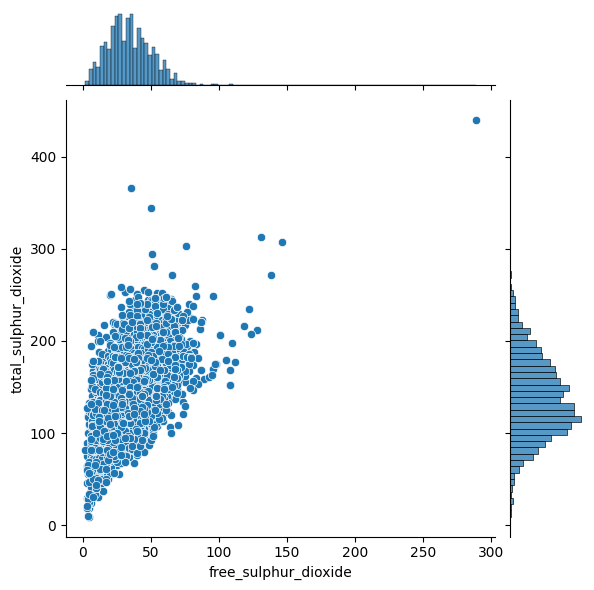

In [3]:
sns.jointplot(data=data, x='free_sulphur_dioxide', y='total_sulphur_dioxide')
plt.show()

So we have generated scatter plot which shows the relation and the histograms on X an Y axis
But due to points overlapping, it is difficult to tell in scatter plot where the data is heigh. 

### Lets use Hexbin to show the relation more clearly

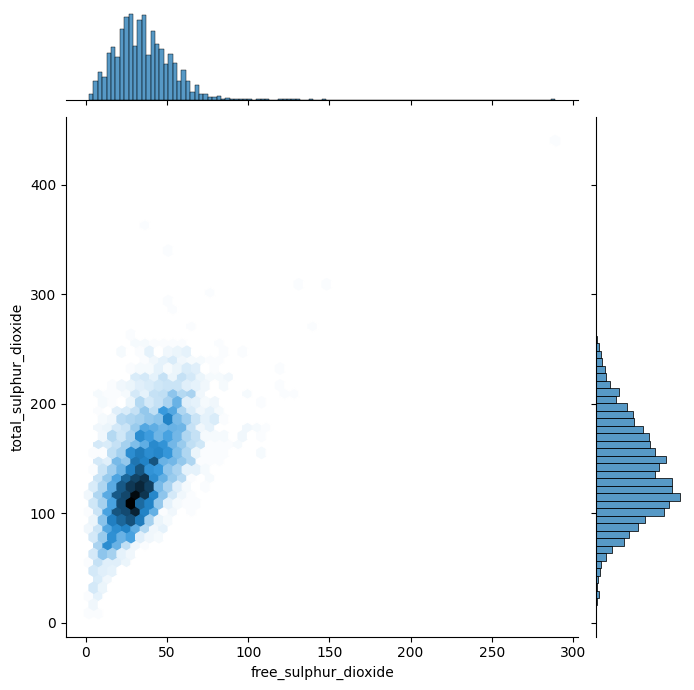

In [4]:
sns.jointplot(data=data, x='free_sulphur_dioxide', y='total_sulphur_dioxide', kind='hex', height=7)
plt.show()

In this hex bin plot, it is much more clear the darker shaded region has more data points

#### This can also be replaced with kde plot 

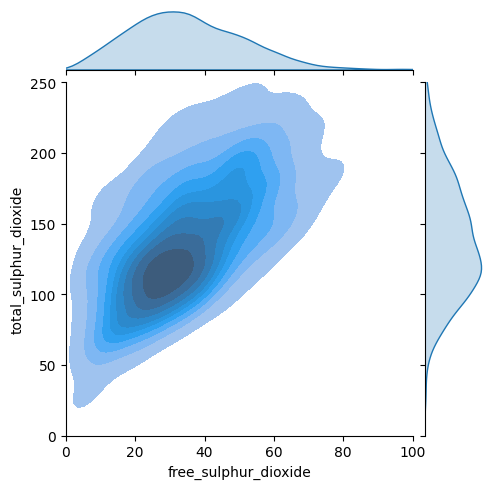

In [5]:
sns.jointplot(data=data, x='free_sulphur_dioxide', y='total_sulphur_dioxide', kind='kde', height=5, fill=True)
# There is lot of free space, so lets clip x and ya axis
plt.xlim(0, 100)
plt.ylim(0, 250)
plt.show()

# Pair Plot
## Lets say in same dataset we want to check the correlation between every variable with other
### We can use Pair plot which can plot the pairs in a grid

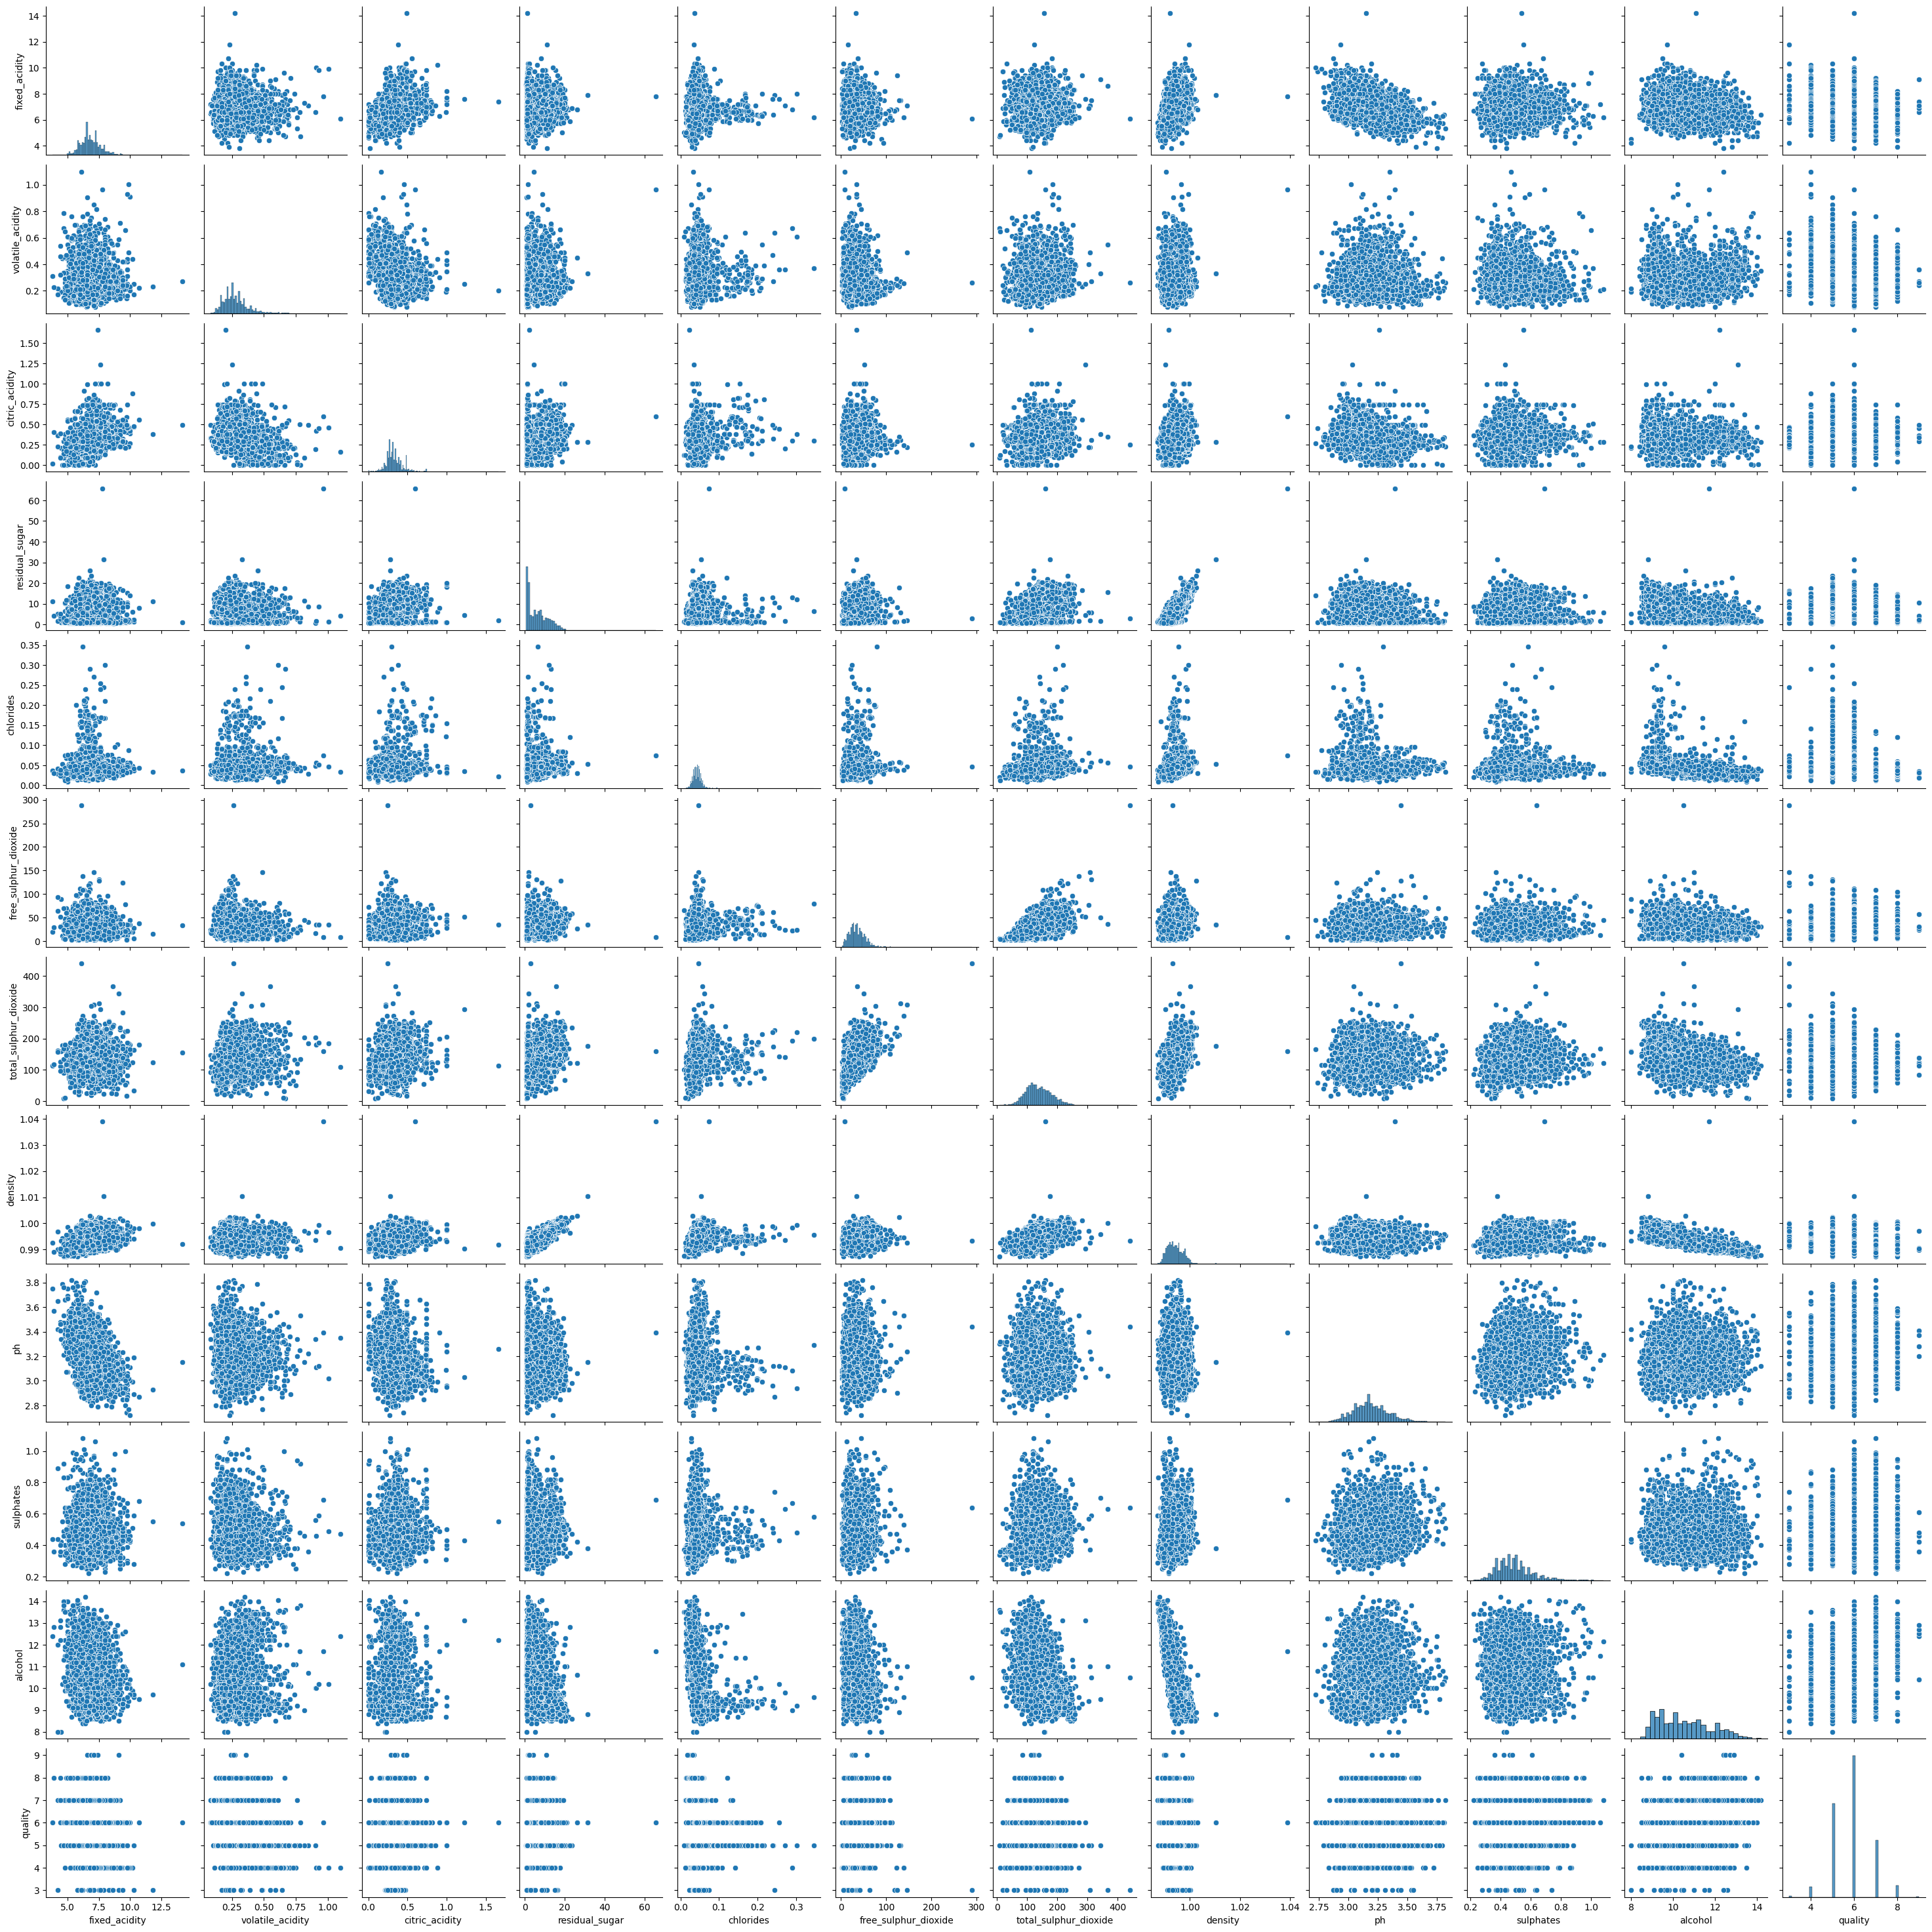

In [6]:
sns.pairplot(data=data)
plt.show()

#### As you can see the diagonals graphs are histogram, that is because diagonal graph become univariate becuase of same variable on x and y
We can show the diagonal graph as KDE

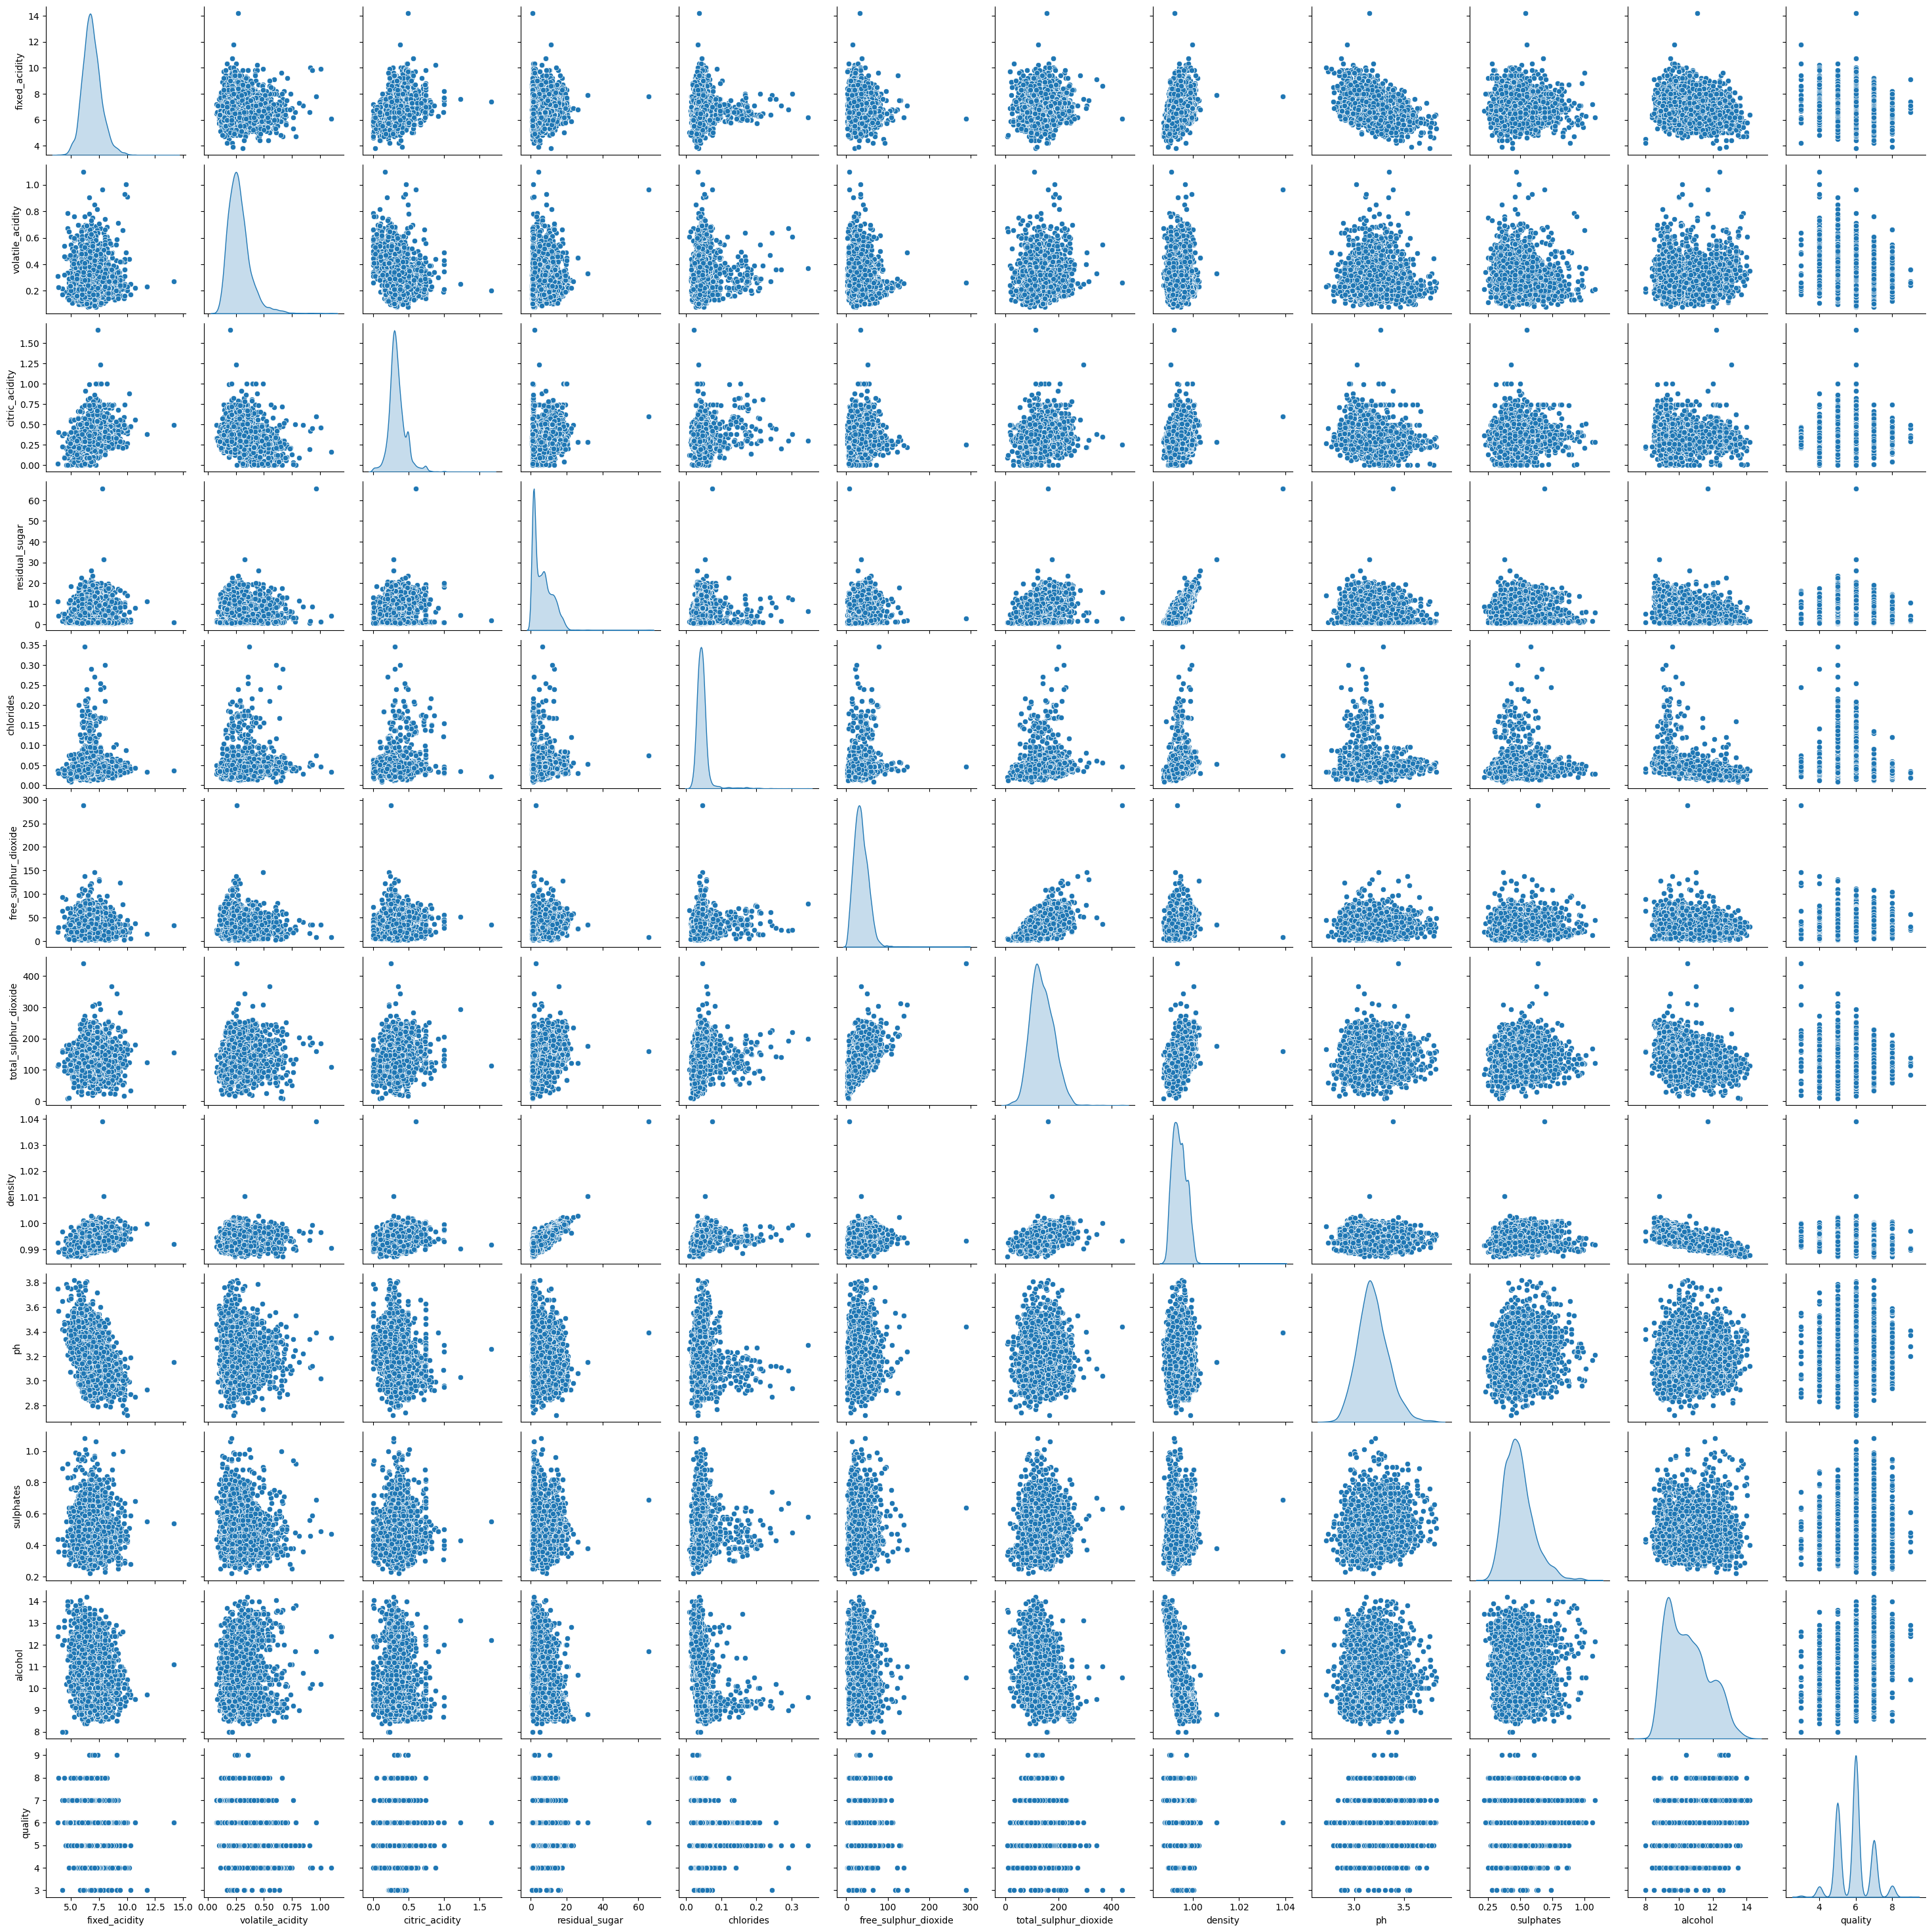

In [7]:
sns.pairplot(data=data, diag_kind='kde')
plt.show()

#### And we can also reduce the number of fields for pairing to reduce the combinations

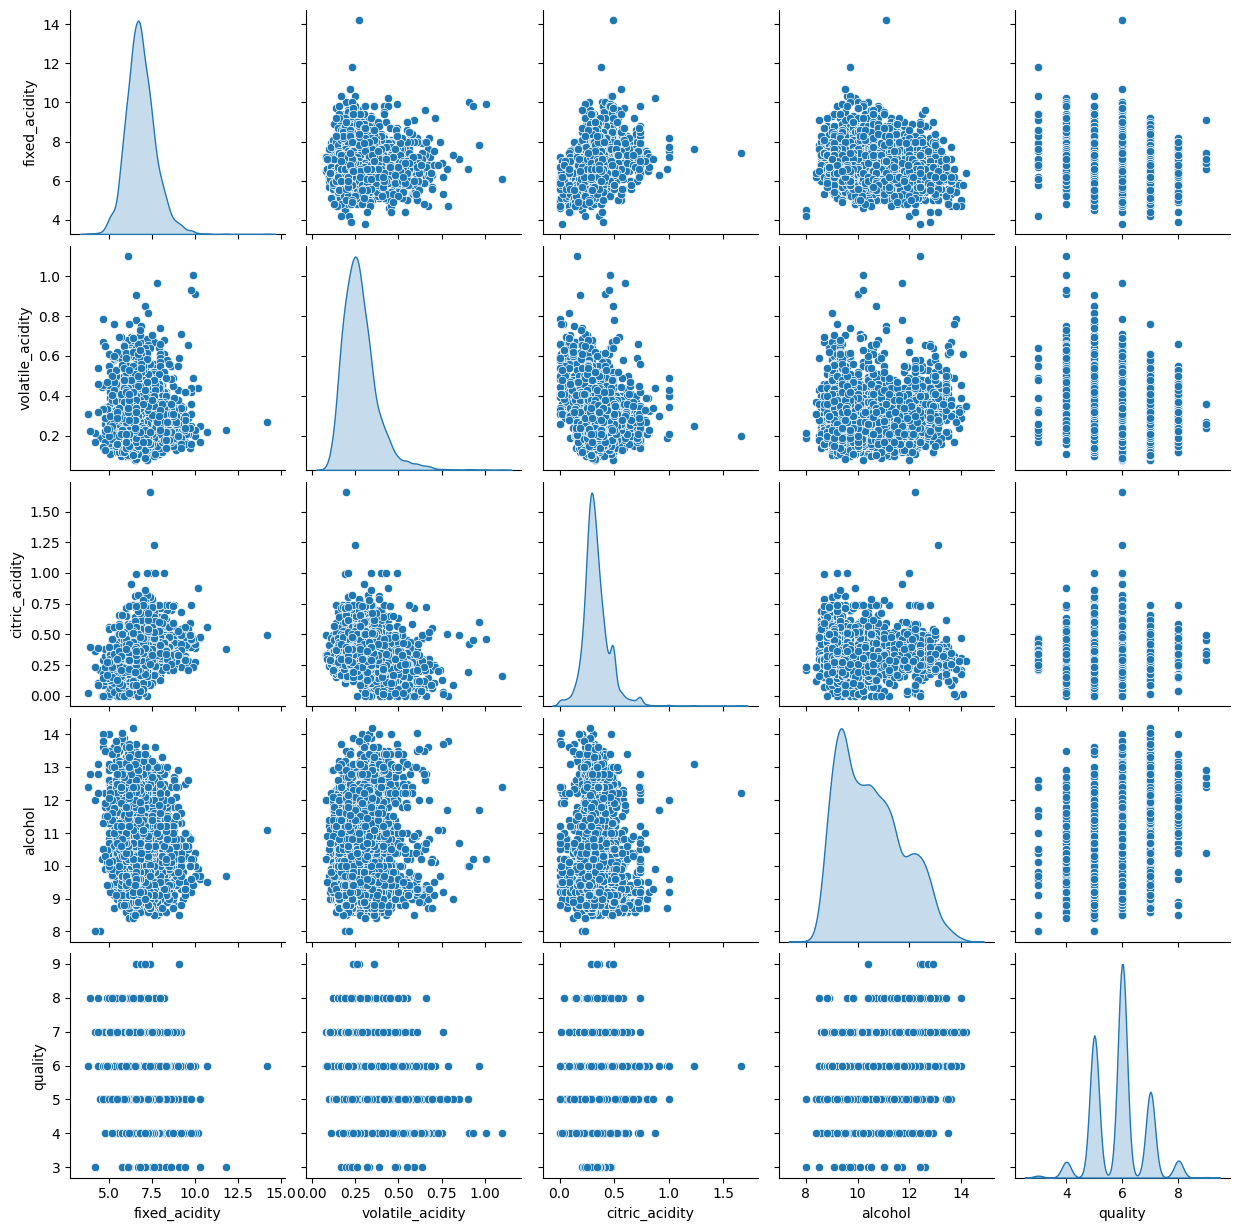

In [8]:
sns.pairplot(data=data, 
             vars=['fixed_acidity', 'volatile_acidity', 'citric_acidity', 'alcohol', 'quality'],
             diag_kind='kde')
plt.show()

#### And we can also show regression line on scatter plots 

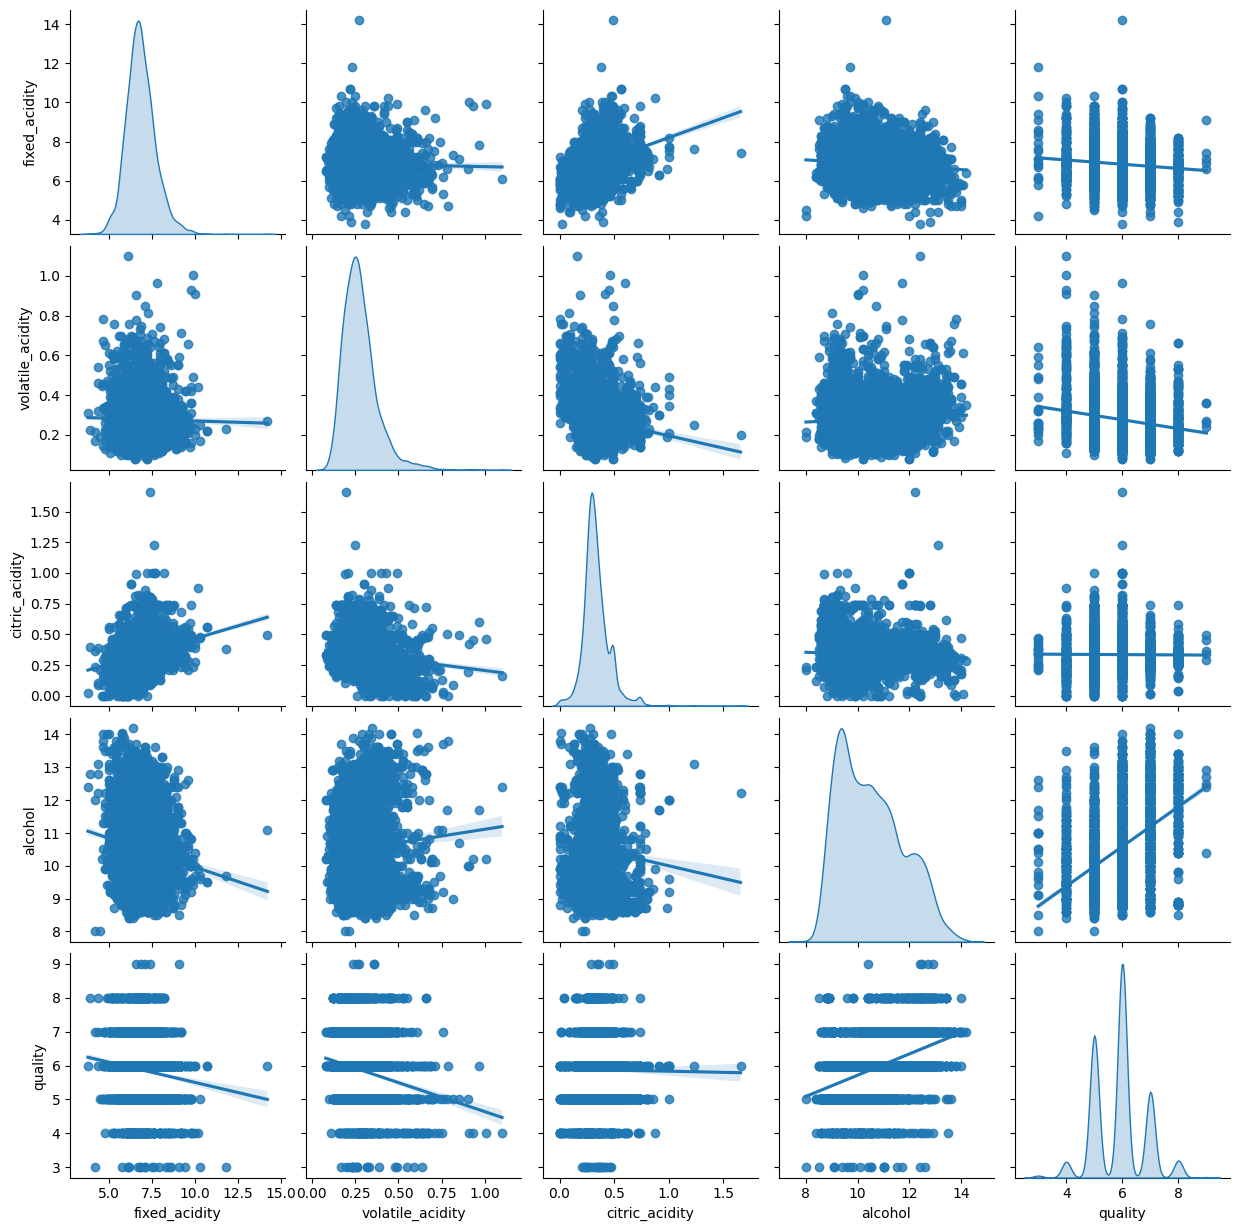

In [9]:
sns.pairplot(data=data, 
             vars=['fixed_acidity', 'volatile_acidity', 'citric_acidity', 'alcohol', 'quality'],
             diag_kind='kde', kind='reg')
plt.show()

### Heatmap
Another way to show correlation between multiple variables is Heatmap
Seaborn heatmap need correlation matrix aas input. Correlation matrix can be easily created using pandas `corr` method

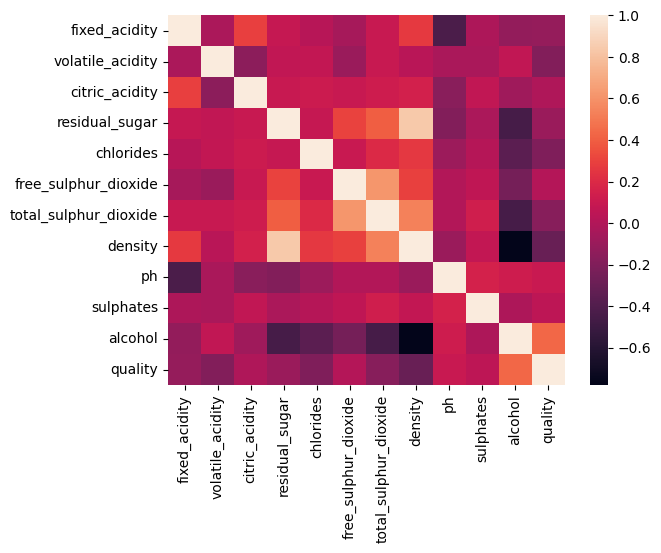

In [10]:
corrmat = data.corr()
sns.heatmap(corrmat)
plt.show()

#### We can also annotate each square and provide format of annotation, and choose color map for better visibility

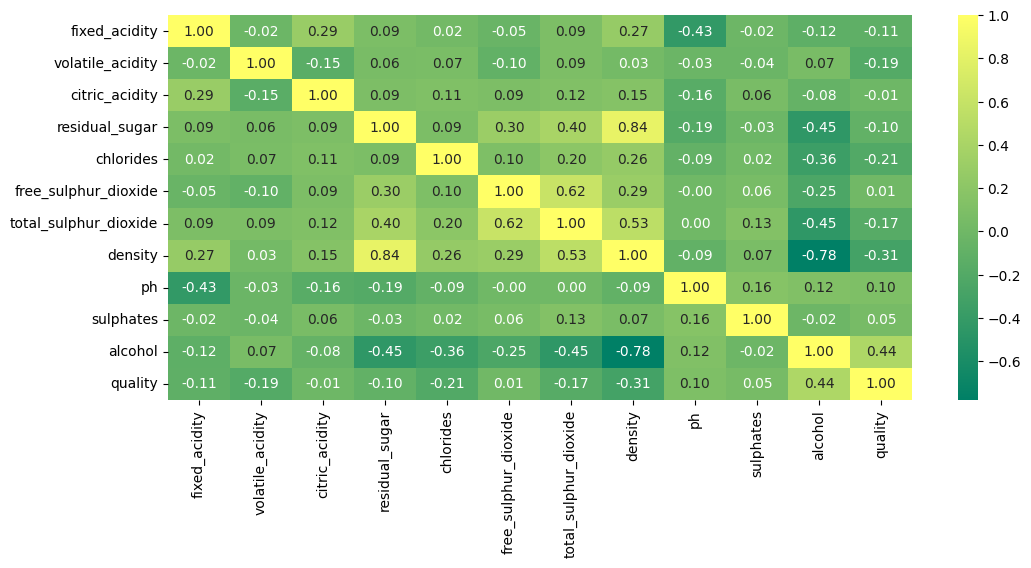

In [11]:
plt.figure(figsize=(12,5))
sns.heatmap(corrmat, annot=True, fmt='.2f', cmap='summer')
plt.show()

# LM Plot
### LM Plot is Linear model plot which is used to find relation between 2 variables
### LM Plot creates scatter plot to show distribution along with regression line.

#### From above heatmap, we can see density ans residual_sugar are highly related, lets try to plot their relation with lmplot

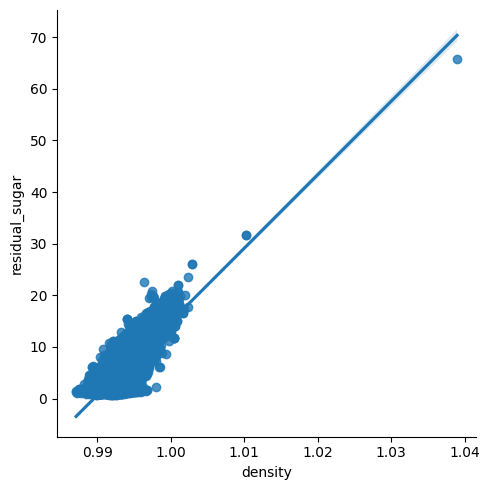

In [12]:
sns.lmplot(data=data, x='density', y='residual_sugar')
plt.show()

Lets color the plot based on hue

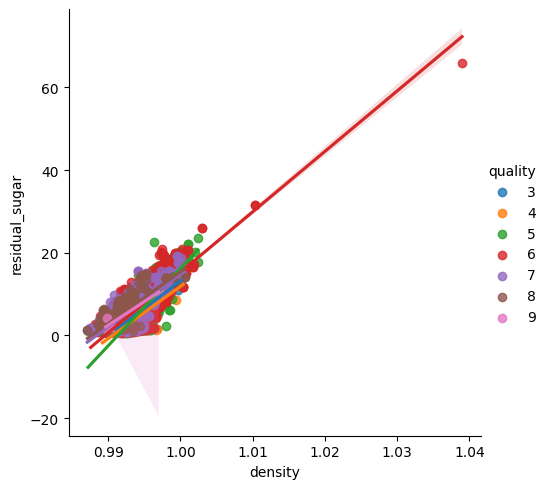

In [13]:
sns.lmplot(data=data, x='density', y='residual_sugar', hue='quality')
plt.show()

This shows there is linear relation between density and residual_sugar. But the relation is tight in lower density, on higher density the relation is loose

### Lets add another dimension to this plot
#### Using `col` or `row` we can create multiple plots for each value of variable defined by `col` or `row`

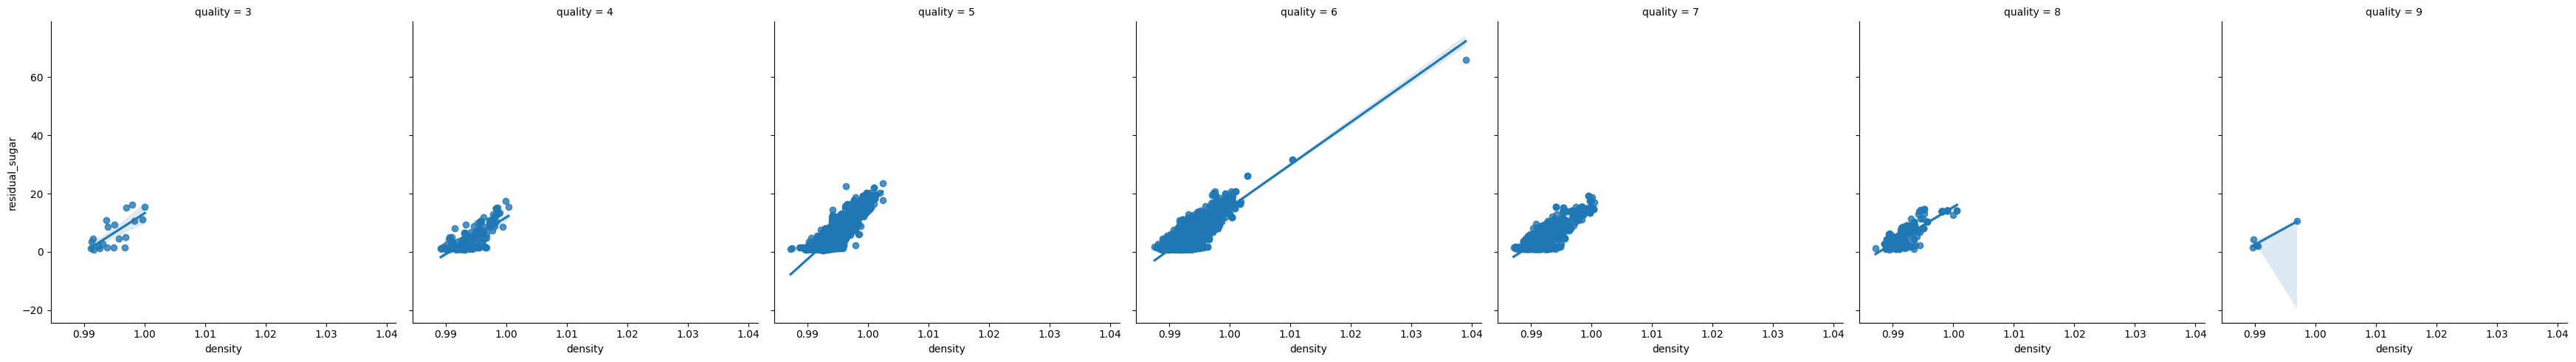

In [14]:
sns.lmplot(data=data, x='density', y='residual_sugar', col='quality')
plt.show()

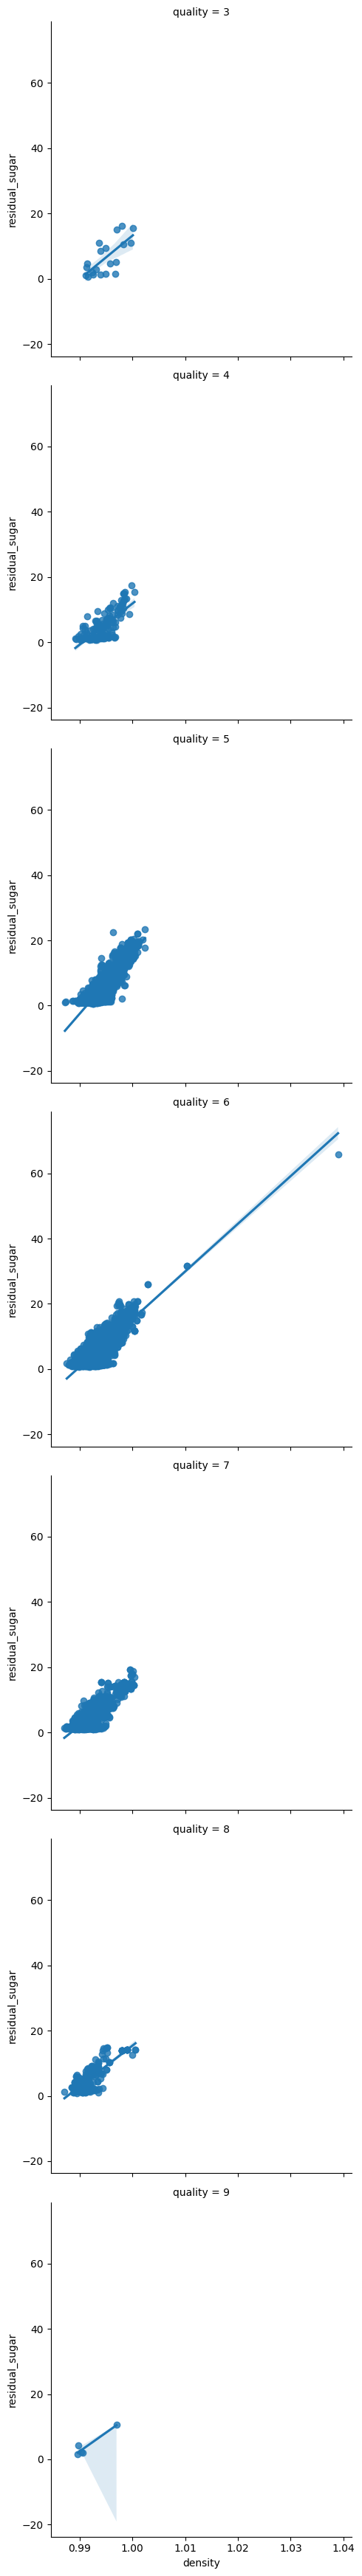

In [15]:
sns.lmplot(data=data, x='density', y='residual_sugar', row='quality')
plt.show()

### Lets plot Quality of Wine against Alcohol content

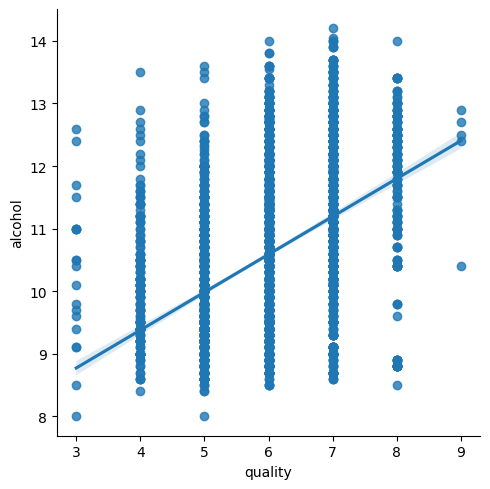

In [16]:
sns.lmplot(data=data, x='quality', y='alcohol')
plt.show()

Now, the Quality seem to be categorical value, thats why the values are in line. 
### We can add some jitter to the values to make it look good. (But note, jitter is just visual representation and has no effect on regression line)

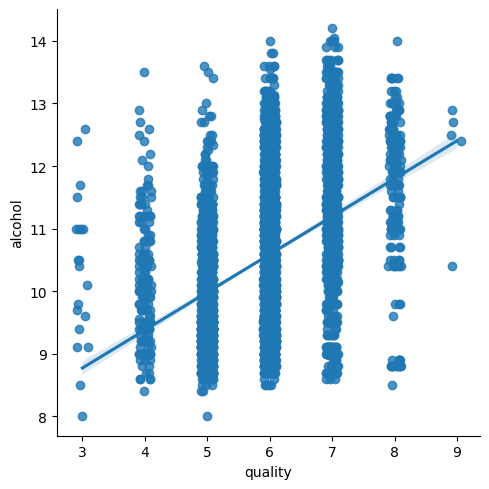

In [17]:
sns.lmplot(data=data, x='quality', y='alcohol', x_jitter=0.1)
plt.show()

### Lets add some estimator for aggregating the points at one point instead of showing 

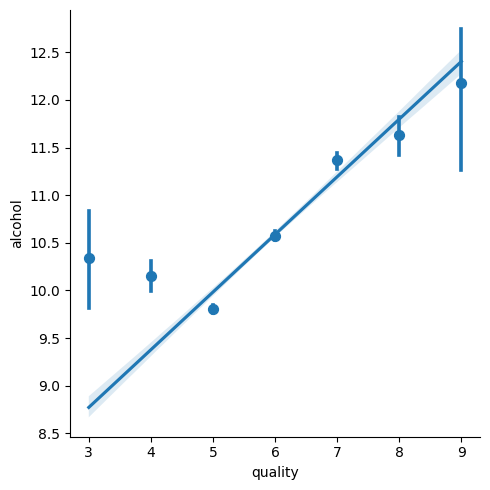

In [18]:
## This will show only 1 point which will be returned by np.mean of for each categorical value on x axis
import numpy as np
sns.lmplot(data=data, x='quality', y='alcohol', x_estimator=np.mean)
plt.show()

Now we can see the quality of wine is directly related to alcohol content

## Reg Plot
#### Reg Plot is axis level plot as opposed to LMPlot which is figure level. 
#### LM Plot provide lot more customization options as compared to reg plot

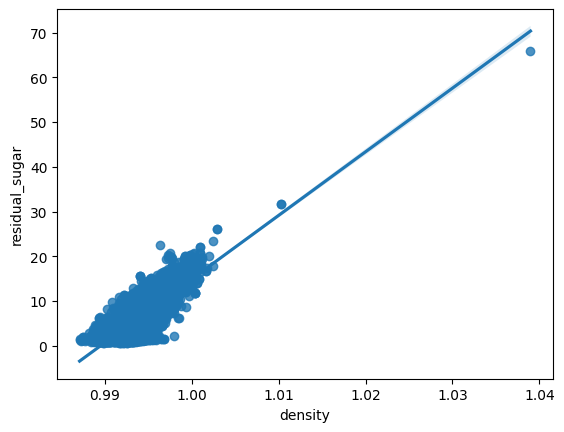

In [19]:
sns.regplot(data=data, x='density', y='residual_sugar')
plt.show()

#### Being axis level plot means, we don't get many customization options like hue on regplot

#### But Regplot can be used as kind for other plots to show Regression line
#### E.g. We can show regression line in following Joint plot using reg

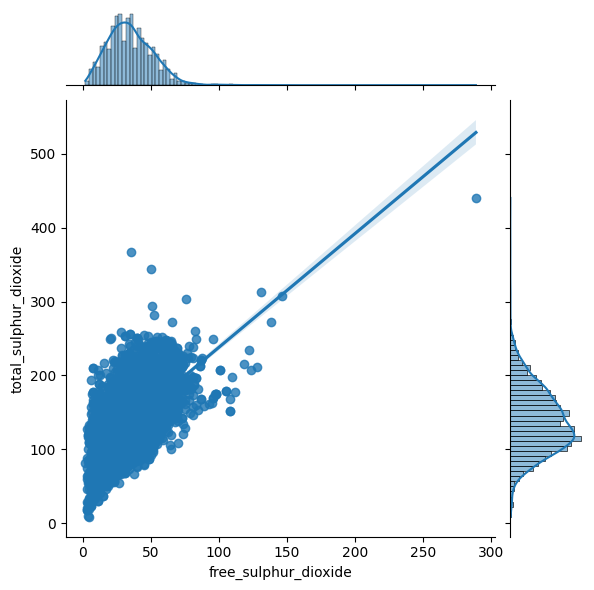

In [20]:
sns.jointplot(data=data, x='free_sulphur_dioxide', y='total_sulphur_dioxide', kind='reg')
plt.show()

Notice it not only create regression line on scatter plot, but also gived KDE on histograms

### We can also all regression line on following Pair Plot

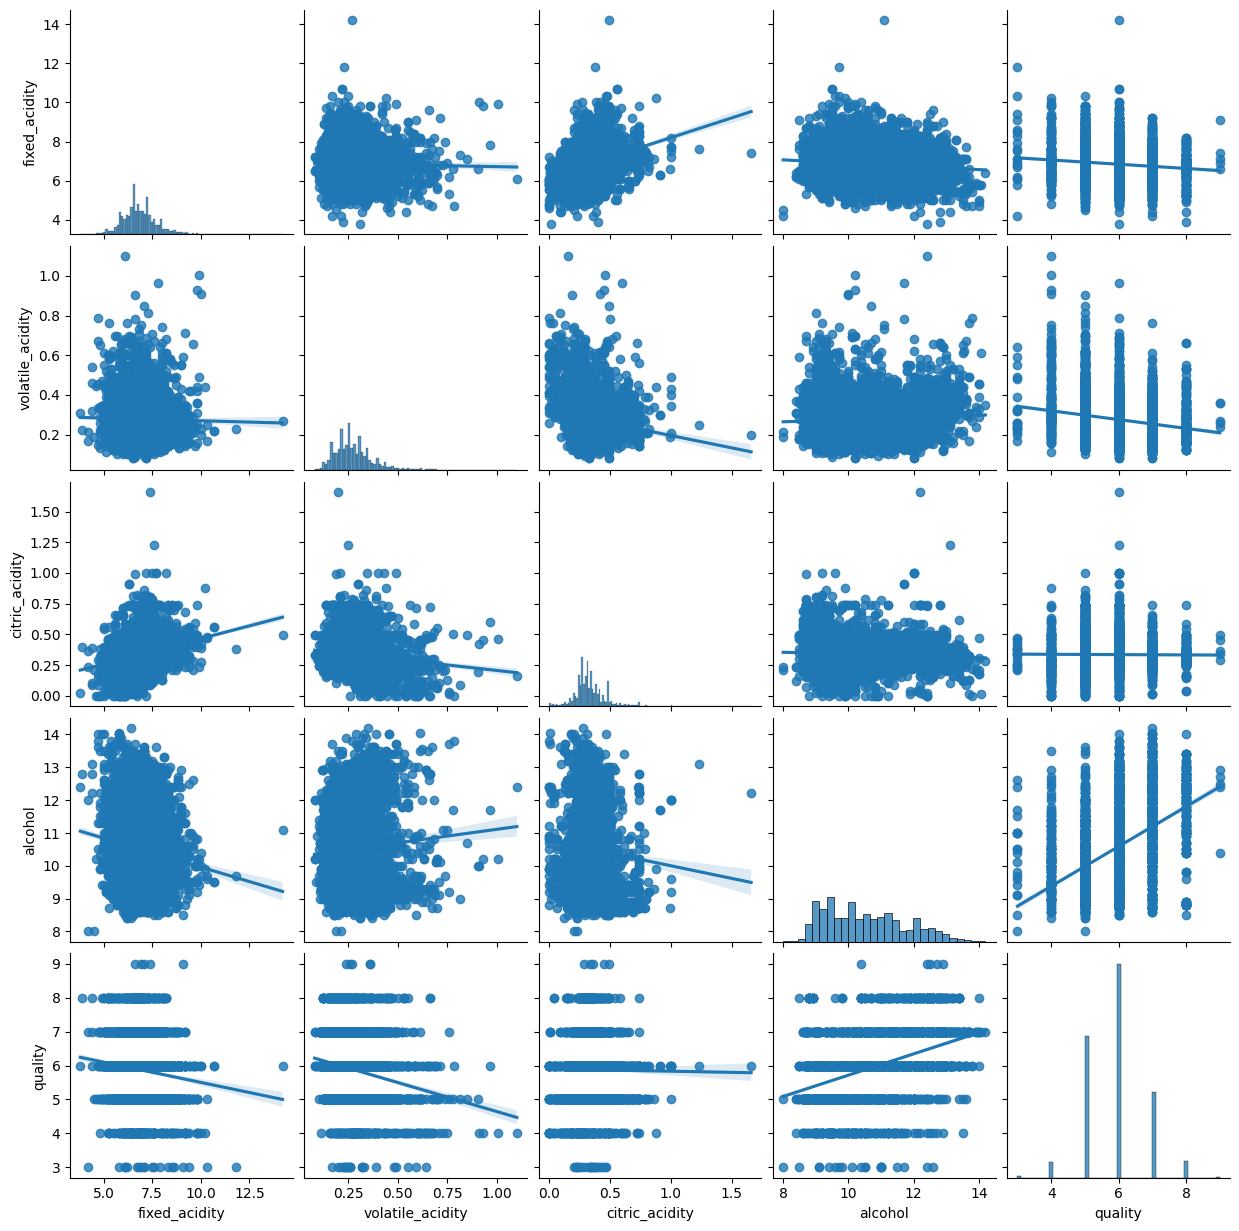

In [21]:
sns.pairplot(data=data, 
             vars=['fixed_acidity', 'volatile_acidity', 'citric_acidity', 'alcohol', 'quality'],
             kind='reg')
plt.show()

# Strip and Swarm Plots
### Strip Plot and Swarm Plots are specifically designed plots for showing Categorical value

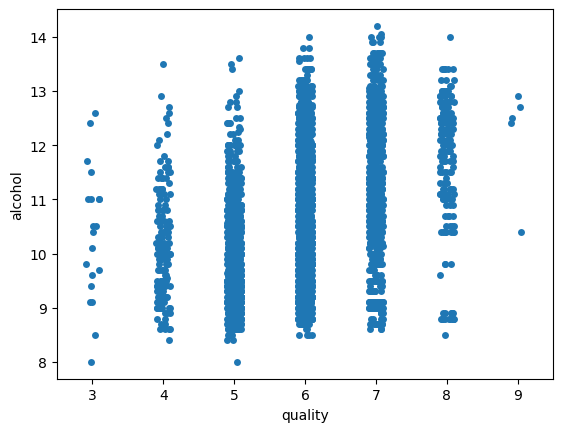

In [22]:
sns.stripplot(data=data, x='quality', y='alcohol')
plt.show()

### We can also add some hue to strip plot

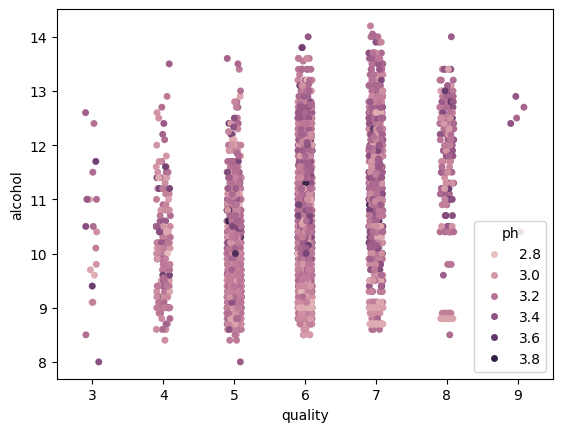

In [23]:
sns.stripplot(data=data, x='quality', y='alcohol', hue='ph')
plt.show()

This automatically adds some jitter to data for better graph

/home/freak/Freak/Trainings/PY-VISUALIZATION/.venv/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 74.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/freak/Freak/Trainings/PY-VISUALIZATION/.venv/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 77.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/freak/Freak/Trainings/PY-VISUALIZATION/.venv/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 41.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/freak/Freak/Trainings/PY-VISUALIZATION/.venv/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 74.7% of the points cannot be placed; you may want to decrease the size of the markers or use strip

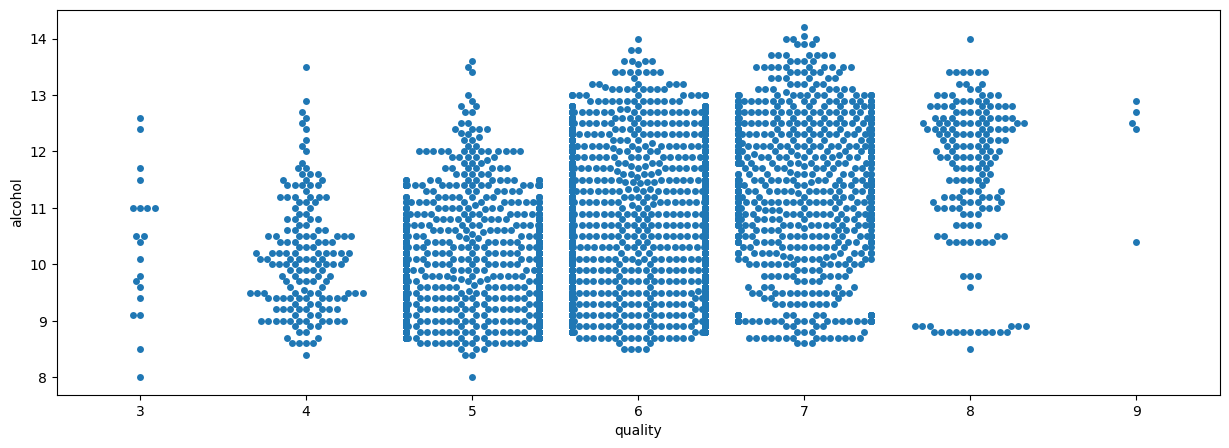

In [24]:
_, ax = plt.subplots(figsize = (15,5))
sns.swarmplot(data=data, x='quality', y='alcohol', ax=ax)
plt.show()

As you can see, swarm plot will show the data point in swarm instead of random jitter

And we can also add some hue to Swarm plot as well

/home/freak/Freak/Trainings/PY-VISUALIZATION/.venv/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 74.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/freak/Freak/Trainings/PY-VISUALIZATION/.venv/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 77.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/freak/Freak/Trainings/PY-VISUALIZATION/.venv/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 41.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/freak/Freak/Trainings/PY-VISUALIZATION/.venv/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 74.7% of the points cannot be placed; you may want to decrease the size of the markers or use strip

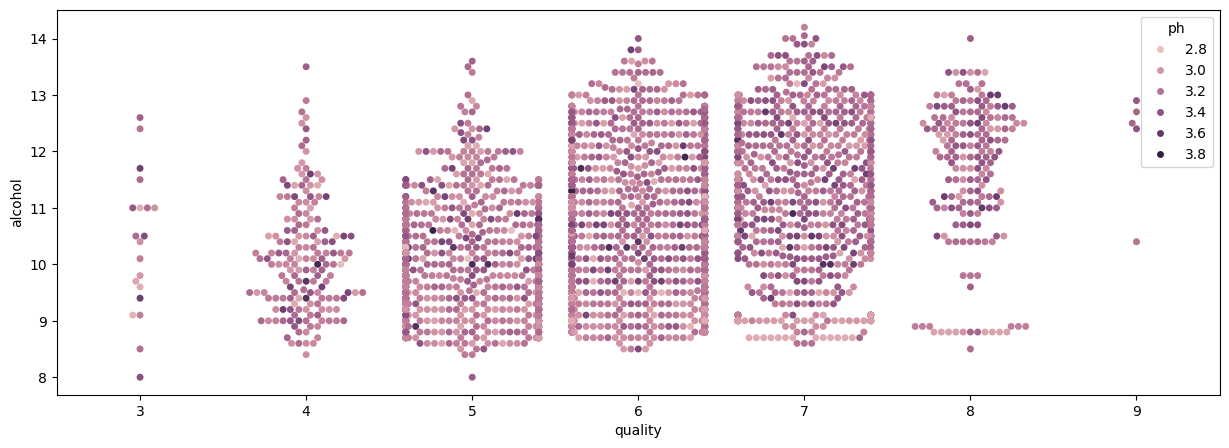

In [25]:
_, ax = plt.subplots(figsize = (15,5))
sns.swarmplot(data=data, x='quality', y='alcohol', hue='ph', ax=ax)
plt.show()

# Box and Violin Plots
### Box plots and Violin plots can also be used to visualize categorical data. The plot will create box and violin for each category

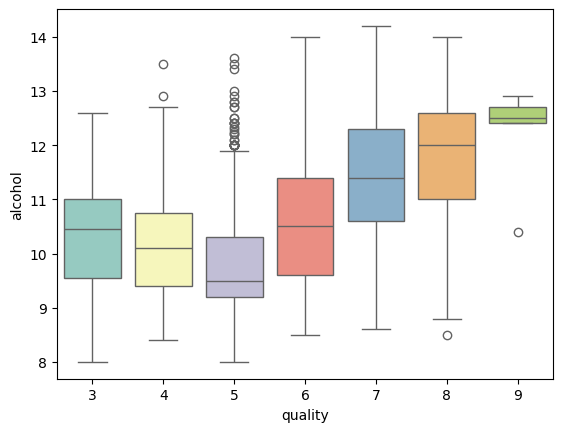

In [26]:
sns.boxplot(data=data, x='quality', y='alcohol', hue='quality', palette='Set3', legend=False)
plt.show()

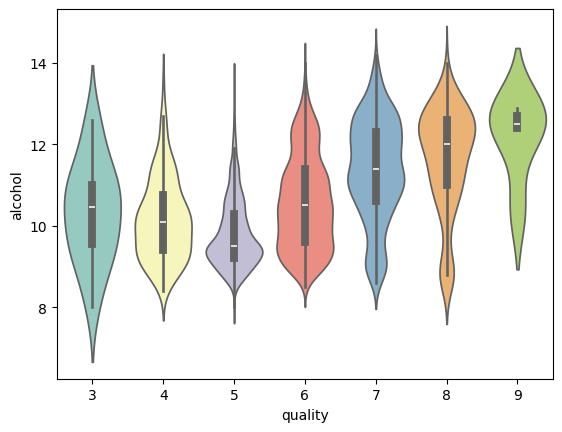

In [27]:
sns.violinplot(data=data, x='quality', y='alcohol', hue='quality', palette='Set3', legend=False)
plt.show()

By Default, violin plot will not only show violin, it will show small box inside to show mean and IQR

### We can replace the inner of violin with sticks instead of box to show actual points


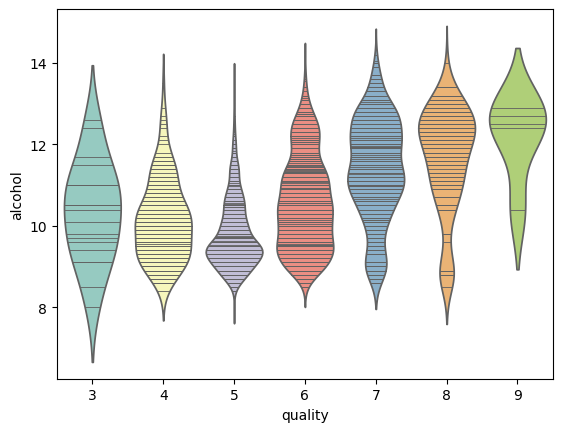

In [28]:
sns.violinplot(data=data, x='quality', y='alcohol', hue='quality', palette='Set3', legend=False, inner='stick')
plt.show()

## Bar, Count, Point Plots

### Bar Plot
Bar plot shows the data in Bars

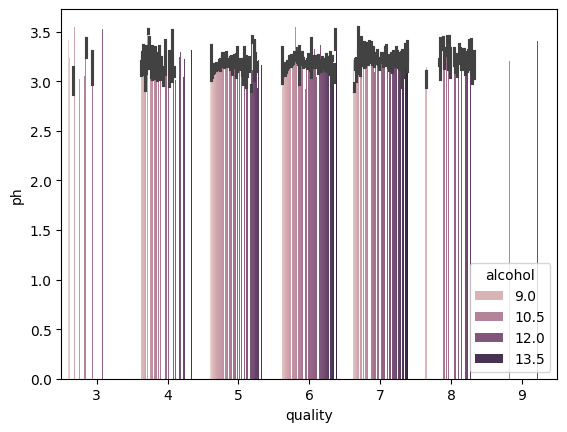

In [30]:
sns.barplot(data=data, x='quality', y='ph', hue='alcohol')
plt.show()

This is good, but if we want to count the number of values in specific categories, we can plot count plot

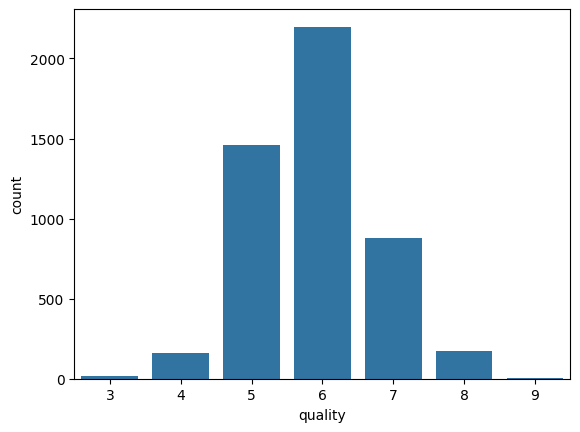

In [32]:
sns.countplot(data=data, x='quality')
plt.show()

Here we don't have to aggregate the data, seaborn aggregate data for us.   
We can show different bars in different color by chosing quality as hue

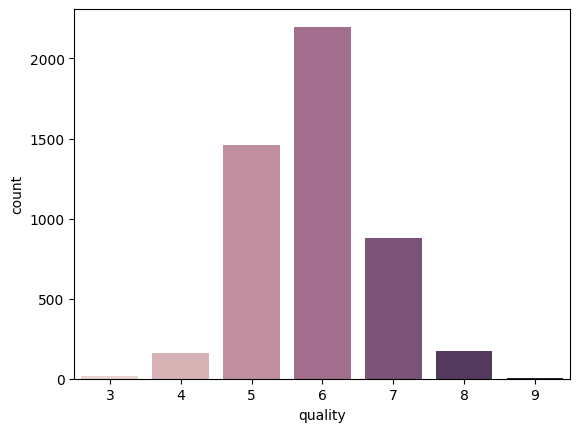

In [34]:
sns.countplot(data=data, x='quality', hue='quality', legend=False)
plt.show()

Point plot is also an aggregation plot where it finds the mean and also plots standard deviation.  

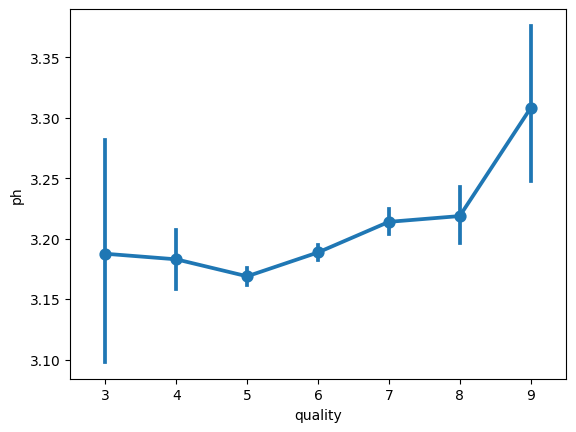

In [38]:
sns.pointplot(data=data, x='quality', y='ph')
plt.show()

So PH is automatically aggregated and mean is shown by dot where as standard deviation is shown with line

We can also add hue to this plot. 

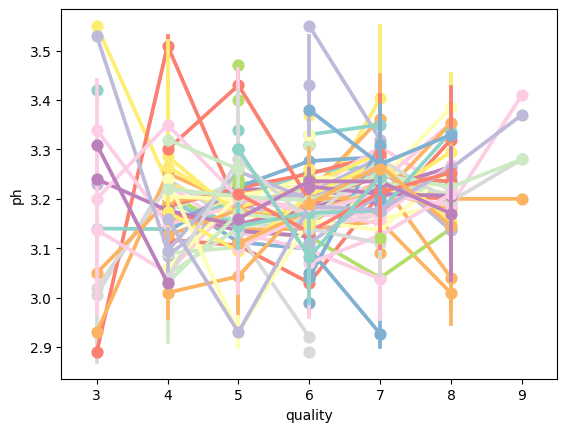

In [42]:
sns.pointplot(data=data, x='quality', y='ph', hue='alcohol', palette='Set3', legend=False)
plt.show()